<a href="https://colab.research.google.com/github/lee-hyeon-gu/alpha_python_begin/blob/main/62%EC%B0%A8%EC%8B%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EC%8B%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm
dic={'user-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}

total=[]
for i in tqdm(range(1,689)):

    url=requests.get('https://finance.naver.com/item/sise_day.naver?code=005930&page={}'.format(i),headers=dic)
    html=BeautifulSoup(url.text)

    table=html.find('table')
    table=pd.read_html(str(table))[0].dropna()
    del table['전일비']
    total.append(table)
    time.sleep(0.2)
table

100%|██████████| 688/688 [09:54<00:00,  1.16it/s]


,날짜,종가,시가,고가,저가,거래량
1,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
2,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
3,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
4,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
5,1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0


In [20]:
samsung=pd.concat(total,ignore_index=True)
samsung['날짜']=pd.to_datetime(samsung['날짜'])
samsung=samsung[::-1]
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6875 entries, 6874 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6875 non-null   datetime64[ns]
 1   종가      6875 non-null   float64       
 2   시가      6875 non-null   float64       
 3   고가      6875 non-null   float64       
 4   저가      6875 non-null   float64       
 5   거래량     6875 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 322.4 KB


In [35]:
samsung.index=range(len(samsung))
samsung

,날짜,종가,시가,고가,저가,거래량
0,1996-06-25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6870,2023-11-15,72200.0,71600.0,72200.0,71500.0,20148677.0
6871,2023-11-16,72800.0,72500.0,73000.0,72300.0,15860451.0
6872,2023-11-17,72500.0,72300.0,73000.0,72300.0,11494644.0
6873,2023-11-20,72700.0,72100.0,73000.0,72100.0,10610157.0


In [36]:
data=[]
target=[]
for i in range(len(samsung)-1):
    a=list(samsung.iloc[i,1:])
    b= samsung.iloc[i+1,1:]
    data.append(a)
    target.append(b)

In [37]:
import numpy as np

data=np.array(data)
target=np.array(target)


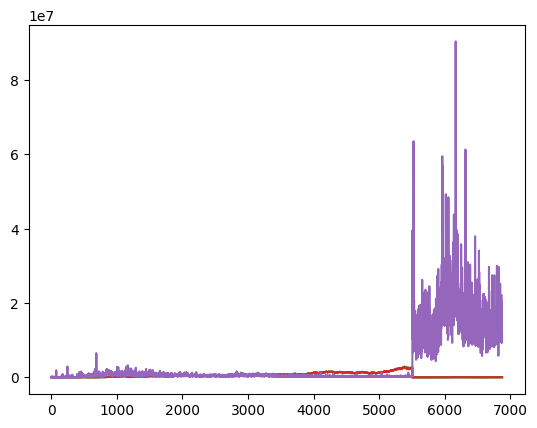

In [38]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

plt.plot(target)

In [39]:
rf=RandomForestRegressor()
rf.fit(data,target)

RandomForestRegressor()

In [41]:
c=list(samsung.iloc[-1][1:])

In [42]:
rf.predict([c])

array([[   73056.  ,    73319.  ,    73526.  ,    72559.  , 13471264.74]])